In [8]:
from kornia.contrib import ImageStitcher
from kornia.feature.loftr import loftr
import torch

import kornia as K
import matplotlib.pyplot as plt
from cluster_stitch import bins


In [12]:
matcher = loftr.LoFTR(pretrained='outdoor')
IS = ImageStitcher(matcher, estimator='ransac').cuda()
def load_images(fnames):

    return [K.io.load_image(fn, K.io.ImageLoadType.RGB32)[None, ...].cuda() for fn in fnames]

imgs = load_images(["2.jpg", "1.jpg"])



In [13]:
# NOTE: it would require a large CPU memory if many images.
with torch.no_grad():
    out = IS(*imgs)

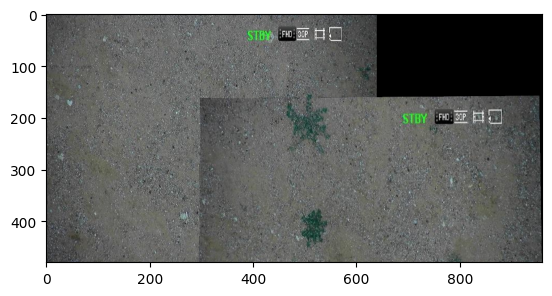

In [18]:
plt.imshow(K.tensor_to_image(out[0]))

plt.show()

In [16]:
print(out.shape)

torch.Size([1, 3, 480, 960])
